In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Layer,Dense

In [21]:
df = pd.read_csv('dataset_star.csv')
print(df)     

     Temperature              L          R    A_M  Color Spectral_Class  Type
0           3068       0.002400     0.1700  16.12    Red              M     0
1           3042       0.000500     0.1542  16.60    Red              M     0
2           2600       0.000300     0.1020  18.70    Red              M     0
3           2800       0.000200     0.1600  16.65    Red              M     0
4           1939       0.000138     0.1030  20.06    Red              M     0
..           ...            ...        ...    ...    ...            ...   ...
235        38940  374830.000000  1356.0000  -9.93   Blue              O     5
236        30839  834042.000000  1194.0000 -10.63   Blue              O     5
237         8829  537493.000000  1423.0000 -10.73  White              A     5
238         9235  404940.000000  1112.0000 -11.23  White              A     5
239        37882  294903.000000  1783.0000  -7.80   Blue              O     5

[240 rows x 7 columns]


In [22]:
#Question 1: Training examples are available in the dataset
print(df.shape[0])

240


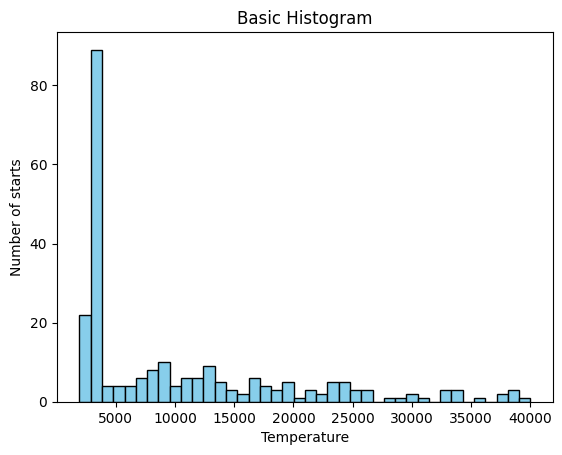

In [23]:
#Question 2: 1D histogram of temperature for all stars
plt.hist(df['Temperature'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Number of starts')
plt.title('Basic Histogram')
plt.show()

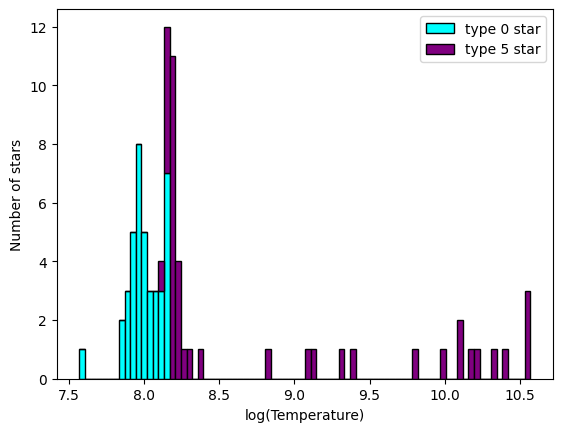

In [44]:
#Question 3: histograms of temperature for type 0 stars (in one color) and type 5 stars
type_0 = df[df["Type"] == 0]
type_1 = df[df["Type"] == 1]
type_2 = df[df["Type"] == 2]
type_3 = df[df["Type"] == 3]
type_4 = df[df["Type"] == 4]
type_5 = df[df["Type"] == 5]

plt.hist([np.log(type_0['Temperature']), np.log(type_5['Temperature'])], bins=80, stacked=True, color=['cyan', 'Purple'], edgecolor='black', label= ['type 0 star', 'type 5 star'])
# plt.hist(np.log(type_0['Temperature']), bins=40,color ='green',stacked=True, alpha = 0.7)
# plt.hist(np.log(type_5['Temperature']), bins=40,color ='red',stacked=True, alpha = 0.7)
plt.ylabel("Number of stars")
plt.xlabel("log(Temperature)")
plt.legend()
plt.show()

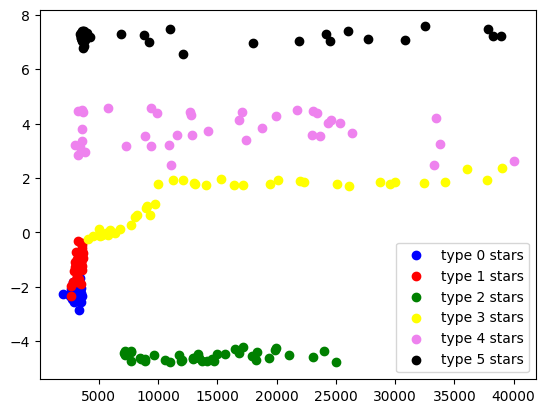

In [25]:
#Question 4:  2D scatter plot of temperature (along X-axis) vs R (along Y-axis) for all stars
plt.scatter(type_0['Temperature'], np.log(type_0['R']), c ="blue", label='type 0 stars')
plt.scatter(type_1['Temperature'], np.log(type_1['R']), c ="red", label='type 1 stars')
plt.scatter(type_2['Temperature'], np.log(type_2['R']), c ="green", label='type 2 stars')
plt.scatter(type_3['Temperature'], np.log(type_3['R']), c ="yellow", label='type 3 stars')
plt.scatter(type_4['Temperature'], np.log(type_4['R']), c ="violet", label='type 4 stars')
plt.scatter(type_5['Temperature'], np.log(type_5['R']), c ="black", label='type 5 stars')
plt.legend()
plt.show()

In [26]:
X = df.iloc[:,0:6]
y = df.iloc[:,-1]

print(X.shape)
print(y.shape)

(240, 6)
(240,)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [28]:
X['Color'].value_counts()

Color
Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: count, dtype: int64

In [29]:
#Preprocessing color
#Replacing similar colors and making all lower case
X['Color']=X['Color'].str.lower()
X['Color'] = X['Color'].replace({'blue-white': 'blue white', 'yellow-white': 'yellowish white', 'white-yellow': 'yellowish white','whitish': 'white'})
print(X['Color'].value_counts())

Color
red                   112
blue                   56
blue white             41
white                  12
yellowish white        12
yellowish               3
orange                  2
pale yellow orange      1
orange-red              1
Name: count, dtype: int64


In [30]:
X['Spectral_Class'].value_counts()

Spectral_Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64

In [31]:
#Question 6: Transforming 'Color','Spectral_Class' to numerical data

from sklearn.preprocessing import OneHotEncoder,StandardScaler

#Scaling inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.iloc[:,0:4])

#One hot Encoded inputs
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)
X_ohe = ohe.fit_transform(X[['Color','Spectral_Class']])

#One hot Encoded outputs
ohe2 = OneHotEncoder(sparse_output=False,dtype=np.int32)
y_ohe= ohe2.fit_transform(y.values.reshape(-1,1))

#Joining all X's together
X_transform= np.hstack((X_scaled,X_ohe))
# print(y_transform)

In [45]:
#Question 7: Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transform,y_ohe,test_size=0.2,random_state=2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(192, 18) (192, 6)
(48, 18) (48, 6)


In [33]:
#Qquestion 8: Neural Network

neural_n = Sequential()

neural_n.add(Dense(18,input_dim=18, activation="relu"))
neural_n.add(Dense(12, activation="relu"))
neural_n.add(Dense(6,activation='softmax'))

neural_n.summary()

C:\Users\shubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             228 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              78 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 648 (2.53 KB)

 Trainable params: 648 (2.53 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
#Question 9: Weights and biases
print("Weights=", 512)
print("biases=", 36)

Weights= 512
biases= 36


In [35]:
#Question 10: Training model
neural_n.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','recall'])

history = neural_n.fit(X_train,y_train, epochs=50, validation_data = (X_test, y_test),verbose=0)

In [43]:
#Question 11: prediction on test data

pred = neural_n.predict(X_test) 
pred = np.argmax(pred, axis = 1)[:] 
label = np.argmax(y_test,axis = 1)[:] 

print("Predicted outputs: ",pred) 
print("Real Outputs: ",label)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicted outputs:  [3 5 2 5 3 2 1 4 3 3 0 2 5 2 5 4 1 0 0 0 1 4 0 2 1 0 2 3 4 0 3 4 2 4 4 1 4
 4 4 1 5 1 2 4 1 5 2 0]
Real Outputs:  [3 5 2 5 3 2 1 4 3 3 1 2 5 2 5 4 1 0 1 0 1 3 0 2 1 0 2 3 3 0 3 3 2 4 4 1 4
 4 4 1 5 1 2 3 1 5 2 0]


In [37]:
#Question 12: Confusion matrix
from sklearn.metrics import confusion_matrix, recall_score
confusion_matrix(label, pred)

array([[6, 0, 0, 0, 0, 0],
       [2, 8, 0, 0, 0, 0],
       [0, 0, 9, 0, 0, 0],
       [0, 0, 0, 6, 4, 0],
       [0, 0, 0, 0, 7, 0],
       [0, 0, 0, 0, 0, 6]], dtype=int64)

In [38]:
#Question 13: Overall accuracy of model
score = neural_n.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])



Test loss: 0.5355929732322693
Test accuracy: 0.875


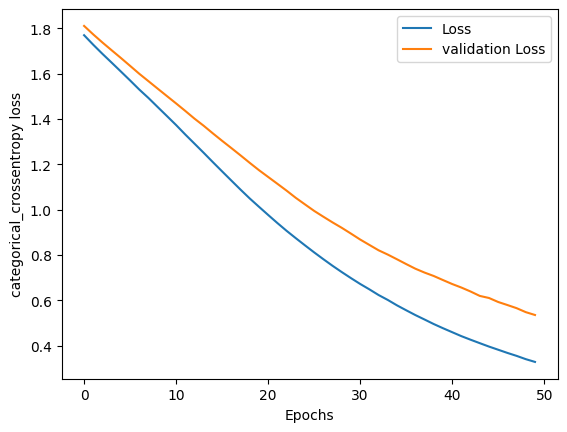

In [39]:
#Question no 14: Plot for loss

plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'],label="validation Loss")
plt.xlabel("Epochs")
plt.ylabel("categorical_crossentropy loss")
plt.legend()
plt.show()

In [40]:
#Question 15: Recall
recall_score(label, pred, average=None)

array([1. , 0.8, 1. , 0.6, 1. , 1. ])

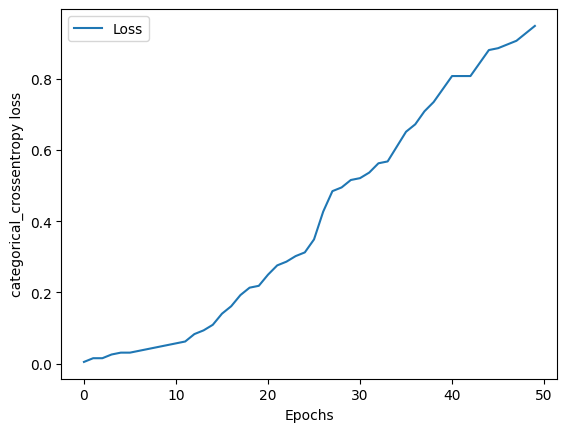

In [41]:
plt.plot(history.history['recall'], label="Loss")
# plt.plot(history.history['val_loss'],label="validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()
plt.show()